# Práctica 4

## Integrantes:


- García Saavedra Armando
- Mejía Yañez José Ehecatl
- Rodriguez Nuñez Diego Eduardo

***
# Introducción:
En esta práctica observaremos un algoritmo que nos permite mayor eficacia al momento de realizar una
multiplicación de números, para ello veremos Divide and Conquer y la representación binaria de un número 
decimal. Además el algoritmo se apoya en el despeje y factorización de algunas ecuaciones, para tranformar
la manera tradicional la cual toma una complejidad de O(n^2) en una complejidad de O(n^(log2(3))),
donde n representa el log2(num) + 1, apoyandose en el mismo proceso tradicional pero al aplicar Divide and 
Conquer y la representación de la ecuación de multiplicacion en binario obtiene una ecuación de recurrencia
T(n) = 3T(n/2) + O(n).

In [1]:
import timeit
import pandas as pd
import matplotlib.pyplot as plt

def karatsuba(x, y):
    if x < 10 or y < 10:
        return x * y

    n = max(x.bit_length(), y.bit_length())
    half = (n + 1) // 2
    mask = (1 << half) - 1

    a = x >> half
    b = x & mask
    c = y >> half
    d = y & mask

    ac = karatsuba(a, c)
    bd = karatsuba(b, d)
    p = karatsuba(a + b, c + d)

    ad_plus_bc = p - ac - bd

    result = (ac << (2 * half)) + (ad_plus_bc << half) + bd

    return result

def multiplicacion_tradicional(x, y):
    return x*y

numeros = [(4, 4), (6, 6), (8, 8), (10, 10), (100, 100)]

tiempos_karatsuba = []
tiempos_tradicional = []  

for x, y in numeros:
    resultado_karatsuba = karatsuba(x, y)
    resultado_tradicional = multiplicacion_tradicional(x, y)

    tiempo_karatsuba = timeit.timeit(lambda: karatsuba(x, y), number=1)
    tiempo_tradicional = timeit.timeit(lambda: multiplicacion_tradicional(x, y), number=1)

    tiempos_karatsuba.append(tiempo_karatsuba)
    tiempos_tradicional.append(tiempo_tradicional)

    print(f"Multiplicación {x} x {y}:")
    print(f"Resultado Karatsuba: {resultado_karatsuba}")
    print(f"Resultado Tradicional: {resultado_tradicional}")
    print(f"Tiempo Karatsuba: {tiempo_karatsuba} segundos")
    print(f"Tiempo Tradicional: {tiempo_tradicional} segundos")
    print("-------------------")

Multiplicación 4 x 4:
Resultado Karatsuba: 16
Resultado Tradicional: 16
Tiempo Karatsuba: 8.00006091594696e-07 segundos
Tiempo Tradicional: 5.00003807246685e-07 segundos
-------------------
Multiplicación 6 x 6:
Resultado Karatsuba: 36
Resultado Tradicional: 36
Tiempo Karatsuba: 1.00000761449337e-06 segundos
Tiempo Tradicional: 6.00004568696022e-07 segundos
-------------------
Multiplicación 8 x 8:
Resultado Karatsuba: 64
Resultado Tradicional: 64
Tiempo Karatsuba: 5.00003807246685e-07 segundos
Tiempo Tradicional: 4.00003045797348e-07 segundos
-------------------
Multiplicación 10 x 10:
Resultado Karatsuba: 100
Resultado Tradicional: 100
Tiempo Karatsuba: 2.400018274784088e-06 segundos
Tiempo Tradicional: 5.00003807246685e-07 segundos
-------------------
Multiplicación 100 x 100:
Resultado Karatsuba: 10000
Resultado Tradicional: 10000
Tiempo Karatsuba: 2.599903382360935e-06 segundos
Tiempo Tradicional: 4.00003045797348e-07 segundos
-------------------


***
# Graficación y tabulación

In [2]:
df = pd.DataFrame({
    'Numeros': numeros,
    'Tiempo Karatsuba': tiempos_karatsuba,
    'Tiempo Tradicional': tiempos_tradicional
})
df

,Numeros,Tiempo Karatsuba,Tiempo Tradicional
0,"(4, 4)",8.000061e-07,5.000038e-07
1,"(6, 6)",1.000008e-06,6.000046e-07
2,"(8, 8)",5.000038e-07,4.000030e-07
3,"(10, 10)",2.400018e-06,5.000038e-07
4,"(100, 100)",2.599903e-06,4.000030e-07


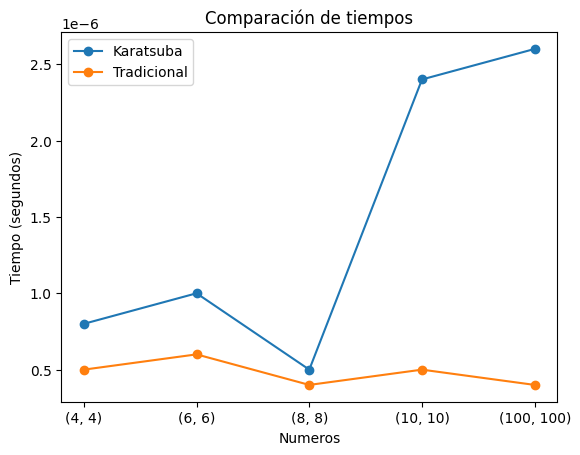

In [3]:
x_labels = [str(n) for n in numeros]
plt.plot(range(len(numeros)), tiempos_karatsuba, marker='o', label='Karatsuba')
plt.plot(range(len(numeros)), tiempos_tradicional, marker='o', label='Tradicional')
plt.xticks(range(len(numeros)), x_labels)
plt.xlabel('Numeros')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparación de tiempos')
plt.legend()
plt.show()

***
# Conclusión:
Aunque las graficas no sean tan exactas (debido al lenguaje), si podemos observar como a mayor crecimiento
de los numeros, la diferencia se remarca aún más, esto es porque la compeljidad de la manera tradicional 
es cuadrática. Con ello, podemos asesgurar que la el algoritmo de Karatsuba es mucho más eficientes
pero a las situaciones de un programador, realmente solo sería util si se utilizan demasidas multiplicaciones,
esto es porque a pesar de ser cuadratica, n sigue representando log2(num).